## Prediction using Supervised ML


* In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. 




Author-Rahul Rao Shinde K

In [ ]:
#Importing all necessary for this notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
print("Setup Complete")

Setup Complete


In [ ]:
#saving filepath to a variable for easier access
stu_data_path="/content/drive/My Drive/TSF/student_scores - student_scores.csv"
#read data and store data in DataFrame titled stu_data
stu_data=pd.read_csv(stu_data_path)
print("Data Imported Successfully")

stu_data.head()

Data Imported Successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
#print a summary of the data in stu_data
stu_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


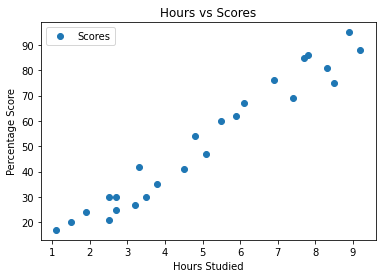

In [ ]:
#Plotting data to understand relationship between the variables:
stu_data.plot(x="Hours",y="Scores",style='o')
plt.title("Hours vs Scores")
plt.legend()
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Score")
plt.show()

In [ ]:
#In this step we will divide the data into "Hours" as the predictor variable and "Scores" as the response variable.
X=stu_data.iloc[:,:-1].values
Y=stu_data.iloc[:,1].values

In [ ]:
from sklearn.model_selection import train_test_split
#split data into training and testing data sets, for both predictor and response variables
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

Training the Algorithm

In [ ]:
#load the modules for linear regression
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train,Y_train)
print("Training Complete")
print("Intercept:",lm.intercept_)
print("Slope:",lm.coef_[0])

Training Complete
Intercept: 2.018160041434662
Slope: 9.91065648064224


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
No handles with labels found to put in legend.


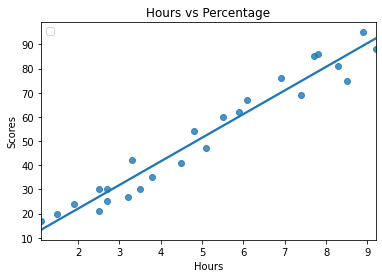

In [ ]:
#Plotting regression line
sns.regplot(X,Y,ci=None)
plt.legend()
plt.title("Hours vs Percentage")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

In [ ]:
#We can output a prediction
y_pred=lm.predict(X_test)

In [ ]:
df = pd.DataFrame({'Hours': X_test[:,0], 'Actual Score': Y_test, 'Predicted Score': y_pred})  
df

,Hours,Actual Score,Predicted Score
0,1.5,20,16.884145
1,3.2,27,33.732261
2,7.4,69,75.357018
3,2.5,30,26.794801
4,5.9,62,60.491033


In [ ]:
# You can also test with your own data
def predict_student_score(hours):
  own_pred = lm.predict([[hours]])
  print("Number of Hours = {}".format(hours))
  print("Predicted Score = {}".format(own_pred[0]))


predict_student_score(9.25)

Number of Hours = 9.25
Predicted Score = 93.69173248737539


In [ ]:
#Evaluating Model Accuracy
from sklearn import metrics
print("Mean Squared Error:",metrics.mean_absolute_error(Y_test,y_pred))
print('R2 Value:', metrics.r2_score(Y_test, y_pred))

Mean Squared Error: 4.183859899002982
R2 Value: 0.9454906892105354


The accuracy of the model is **94.54%**